# Regression Outputs

In [28]:
from IPython.display import HTML, display
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

## Model 1: characteristics only

### HK Cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/797954507.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')


(105944, 9)
(26487, 9)
(105944,)
(26487,)
Intercept:
-109268.94843216386


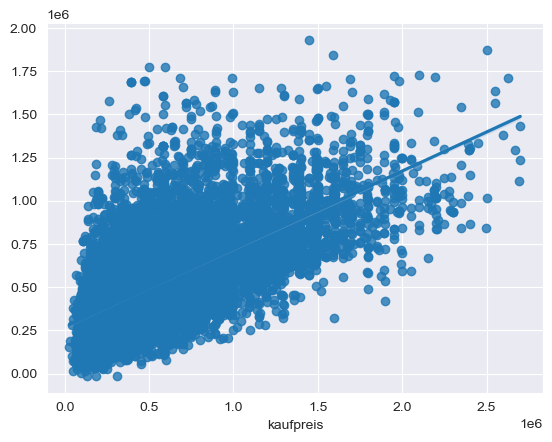

In [29]:
hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')
df_hk_characteristics = pd.DataFrame(hk_characteristics)

X = df_hk_characteristics[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer','keller', 'parkplatz', 'age', 'objektzustand']]
Y = df_hk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
#print(hk_ls.summary())

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/4246231534.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')


(334231, 7)
(83558, 7)
(334231,)
(83558,)
Intercept:
-123259.85104724008


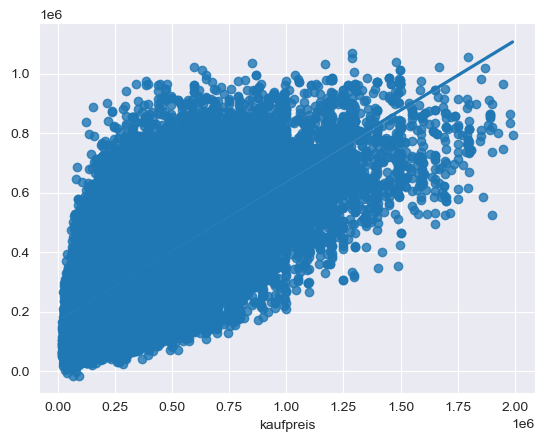

In [30]:
wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')
df_wk_characteristics = pd.DataFrame(wk_characteristics)

X = df_wk_characteristics[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
#print(wk_ls.summary())

In [31]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
#stargazer_tab.title('Model 1')
stargazer_tab.covariate_order(['const', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-1.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 2: macroeconomic factors only

### HK cities dataset

(153, 5)
(39, 5)
(153,)
(39,)


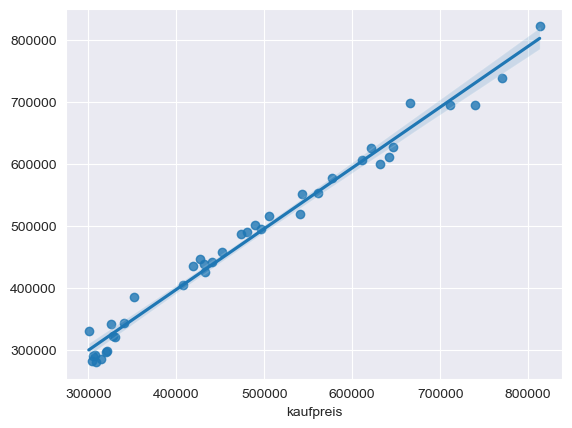

In [32]:
hk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_macro_factors_cleaned.csv')
df_hk_macro_factors = pd.DataFrame(hk_macro_factors)

X = df_hk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'BIP_pro_kopf']]
Y = df_hk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
#print(ls.summary())

### WK cities dataset

(153, 6)
(39, 6)
(153,)
(39,)


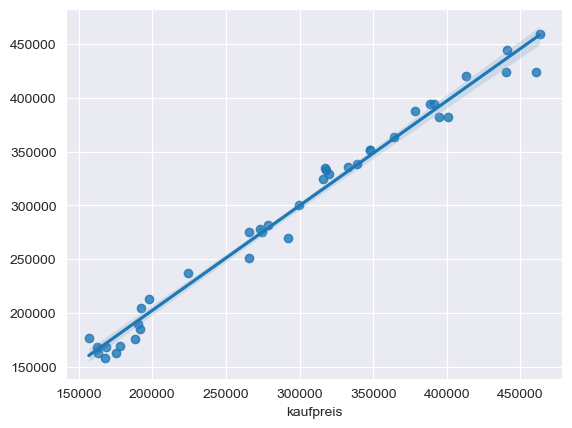

In [33]:
wk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_macro_factors_cleaned.csv')
df_wk_macro_factors = pd.DataFrame(wk_macro_factors)

X = df_wk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'Baugenehmigungen', 'BIP_pro_kopf']]
Y = df_wk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
#print(ls.summary())

In [34]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'BIP_pro_kopf': 'GDP per capita'
    })
open('./Regression-Output/model-2.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 3: characteristics and macroeconomic factors combines

### HK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/2393339041.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')


(105944, 14)
(26487, 14)
(105944,)
(26487,)


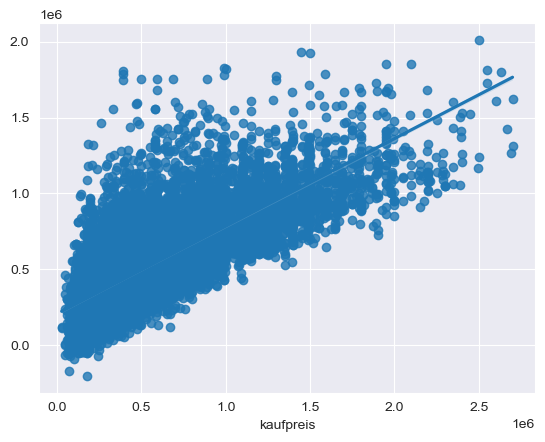

In [35]:
hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')
df_hk_both_factors = pd.DataFrame(hk_both_factors)

X = df_hk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'BIP_pro_kopf', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age','objektzustand']]
Y = df_hk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
#print(hk_ls.summary())

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/2748826258.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')


(334231, 13)
(83558, 13)
(334231,)
(83558,)


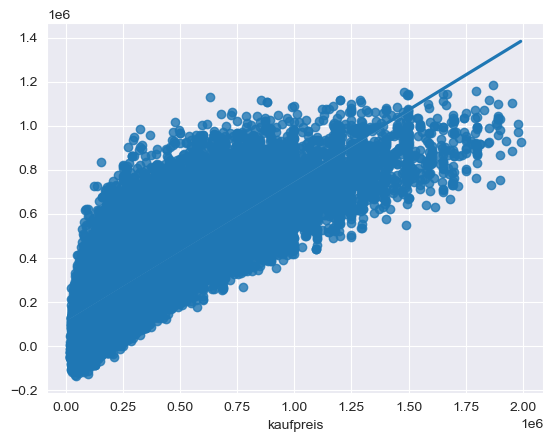

In [36]:
wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')
df_wk_both_factors = pd.DataFrame(wk_both_factors)

X = df_wk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer','badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm).fit()
#print(wk_ls.summary())

In [37]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'BIP_pro_kopf': 'GDP per capita',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-3.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 4: cross-sectional dataset

### HK cities dataset

(53628, 15)
(13408, 15)
(53628,)
(13408,)
Intercept:
769648.2069857565


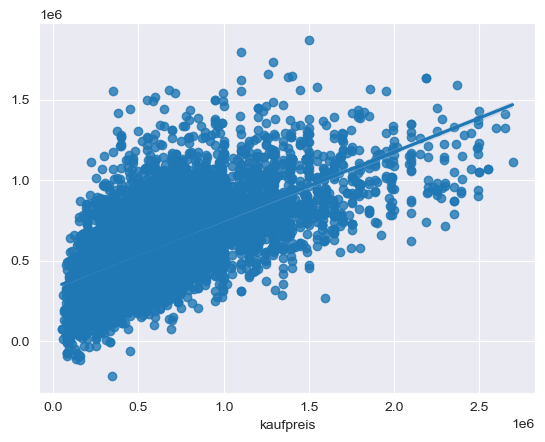

In [38]:
hk_2022 = pd.read_csv('./Data/Cleaned-Datasets/HK_2022_cleaned.csv')
df_hk_2022 = pd.DataFrame(hk_2022)

X = df_hk_2022[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age', 'objektzustand', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_hk_2022['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
#print(hk_ls.summary())

### WK cities dataset

(53710, 12)
(13428, 12)
(53710,)
(13428,)
Intercept:
426631.63366853737


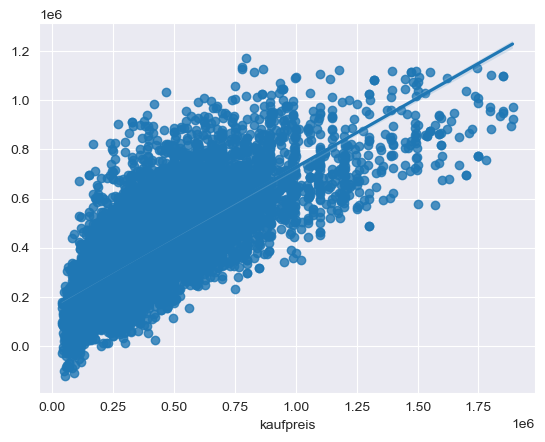

In [39]:
wk_2022 = pd.read_csv('./Data/Cleaned-Datasets/WK_2022_cleaned.csv')
df_wk_2022 = pd.DataFrame(wk_2022)

X = df_wk_2022[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_wk_2022['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
#print(wk_ls.summary())

In [40]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Leerstandsquote': 'Vacancy rate',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-4.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab